## **Plant Disease Detection using Convolutional Neural Networks**

This project aims to develop a deep learning model for classifying plant diseases using images of leaves. The PlantVillage dataset, containing images of various plant species and their associated diseases, will be used for training and evaluation. A Convolutional Neural Network (CNN) will be employed as the classification model due to its effectiveness in image recognition tasks.

In [1]:
#Import necessary libraries
import os
import shutil
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import (ImageDataGenerator,
                                                  img_to_array, load_img)

In [2]:
!ls

drive  sample_data


In [3]:
# Unzipping the dataset from google drive
with ZipFile("/content/drive/MyDrive/plantvillage.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
!ls

 drive	'plantvillage dataset'	 sample_data


##Dataset Exploration

In [5]:
print(os.listdir('plantvillage dataset'))

['grayscale', 'segmented', 'color']



The PlantVillage dataset is organized into three folders:

*   **color:** Contains RGB color images of plant leaves.
*   **grayscale:** Contains black and white versions of the images.
*   **segmented:** Contains images with segmented plant parts.

Each folder contains subfolders representing different plant species and their associated diseases.

In [6]:
# Set the path to dataset directory
path_segmented = "plantvillage dataset/segmented"
path_color = "plantvillage dataset/color"
path_grayscale = "plantvillage dataset/grayscale"

# List all folders
folder_segemented = os.listdir(path_segmented)
folder_color = os.listdir(path_color)
folder_grayscale = os.listdir(path_grayscale)

# Print the total number of folders
print(len(folder_segemented))

print(len(folder_color))

print(len(folder_grayscale))

38
38
38


There are a total of 38 categories, including both healthy and diseased plants

In [7]:
# Print each folder name
for folder in folder_color:
    print(folder)

Corn_(maize)___Common_rust_
Pepper,_bell___Bacterial_spot
Tomato___Leaf_Mold
Cherry_(including_sour)___healthy
Potato___Late_blight
Corn_(maize)___Northern_Leaf_Blight
Apple___Cedar_apple_rust
Tomato___Target_Spot
Tomato___Late_blight
Corn_(maize)___healthy
Strawberry___Leaf_scorch
Potato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Strawberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Blueberry___healthy
Apple___Apple_scab
Pepper,_bell___healthy
Apple___Black_rot
Tomato___Early_blight
Tomato___Bacterial_spot
Tomato___Spider_mites Two-spotted_spider_mite
Potato___healthy
Apple___healthy
Tomato___healthy
Peach___healthy
Raspberry___healthy
Grape___healthy
Grape___Esca_(Black_Measles)
Tomato___Tomato_mosaic_virus
Cherry_(including_sour)___Powdery_mildew
Tomato___Septoria_leaf_spot
Peach___Bacterial_spot
Grape___Black_rot
Orange___Haunglongbing_(Citrus_greening)


In [8]:
#List all files in the folder and count them

for folder in folder_color:
    folder_path = os.path.join(path_color, folder)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        print(f"{folder}: {len(image_files)} images")

Corn_(maize)___Common_rust_: 1192 images
Pepper,_bell___Bacterial_spot: 997 images
Tomato___Leaf_Mold: 952 images
Cherry_(including_sour)___healthy: 854 images
Potato___Late_blight: 1000 images
Corn_(maize)___Northern_Leaf_Blight: 985 images
Apple___Cedar_apple_rust: 275 images
Tomato___Target_Spot: 1404 images
Tomato___Late_blight: 1909 images
Corn_(maize)___healthy: 1162 images
Strawberry___Leaf_scorch: 1109 images
Potato___Early_blight: 1000 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 images
Strawberry___healthy: 456 images
Soybean___healthy: 5090 images
Squash___Powdery_mildew: 1835 images
Blueberry___healthy: 1502 images
Apple___Apple_scab: 630 images
Pepper,_bell___healthy: 1478 images
Apple___Black_rot: 621 images
Tomato___Early_blight: 1000 images
Tomato___Bacterial_spot: 2127 images
Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
Potato___he

##Data Visualization

Total categories (diseases + healthy): 38
Categories: ['Corn_(maize)___Common_rust_', 'Pepper,_bell___Bacterial_spot', 'Tomato___Leaf_Mold', 'Cherry_(including_sour)___healthy', 'Potato___Late_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Tomato___Late_blight', 'Corn_(maize)___healthy', 'Strawberry___Leaf_scorch', 'Potato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Strawberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Blueberry___healthy', 'Apple___Apple_scab', 'Pepper,_bell___healthy', 'Apple___Black_rot', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Potato___healthy', 'Apple___healthy', 'Tomato___healthy', 'Peach___healthy', 'Raspberry___healthy', 'Grape___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Cherry_(incl

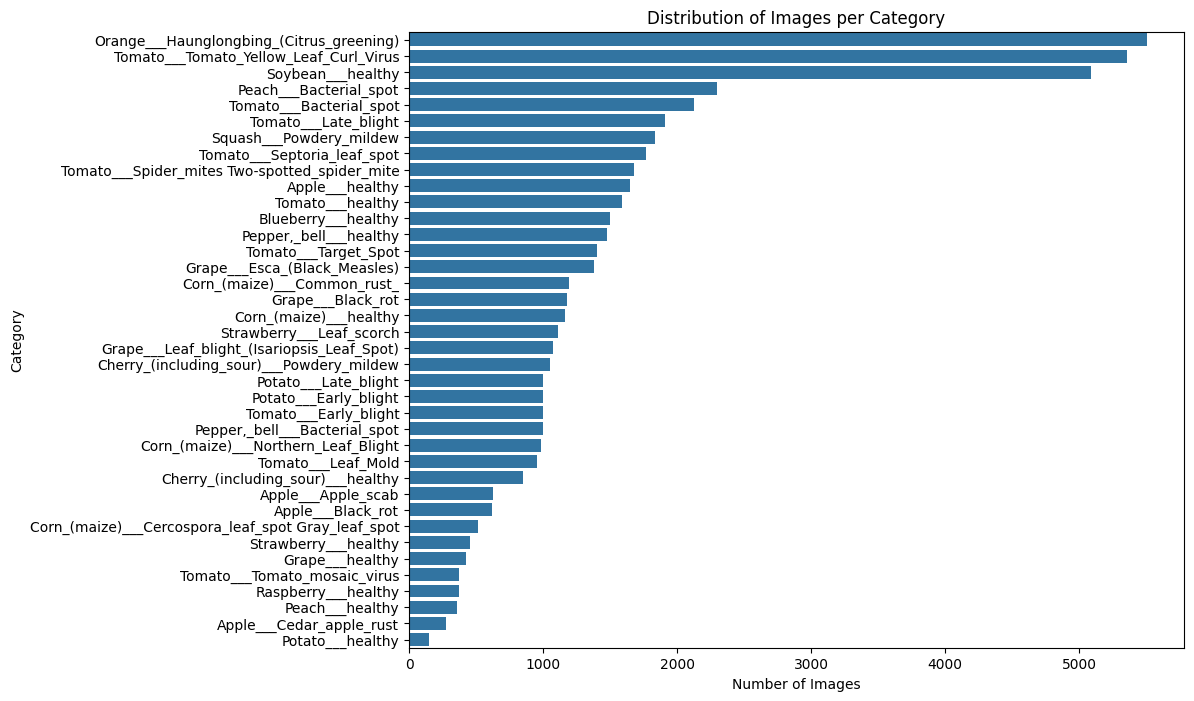

In [9]:
# List all subdirectories (these represent classes)
categories = os.listdir(path_color)

print(f"Total categories (diseases + healthy): {len(categories)}")
print(f"Categories: {categories}")

# Count the number of images per category
category_counts = {category: len(os.listdir(os.path.join(path_color, category))) for category in categories}
category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Number of Images'])

# Plot distribution of images per category
plt.figure(figsize=(10, 8))
sns.barplot(x='Number of Images', y='Category', data=category_df.sort_values(by='Number of Images', ascending=False))
plt.title("Distribution of Images per Category")
plt.show()


In [10]:
#print total no. of images
total_images = sum(category_counts.values())
print(f"Total number of images: {total_images}")

Total number of images: 54305


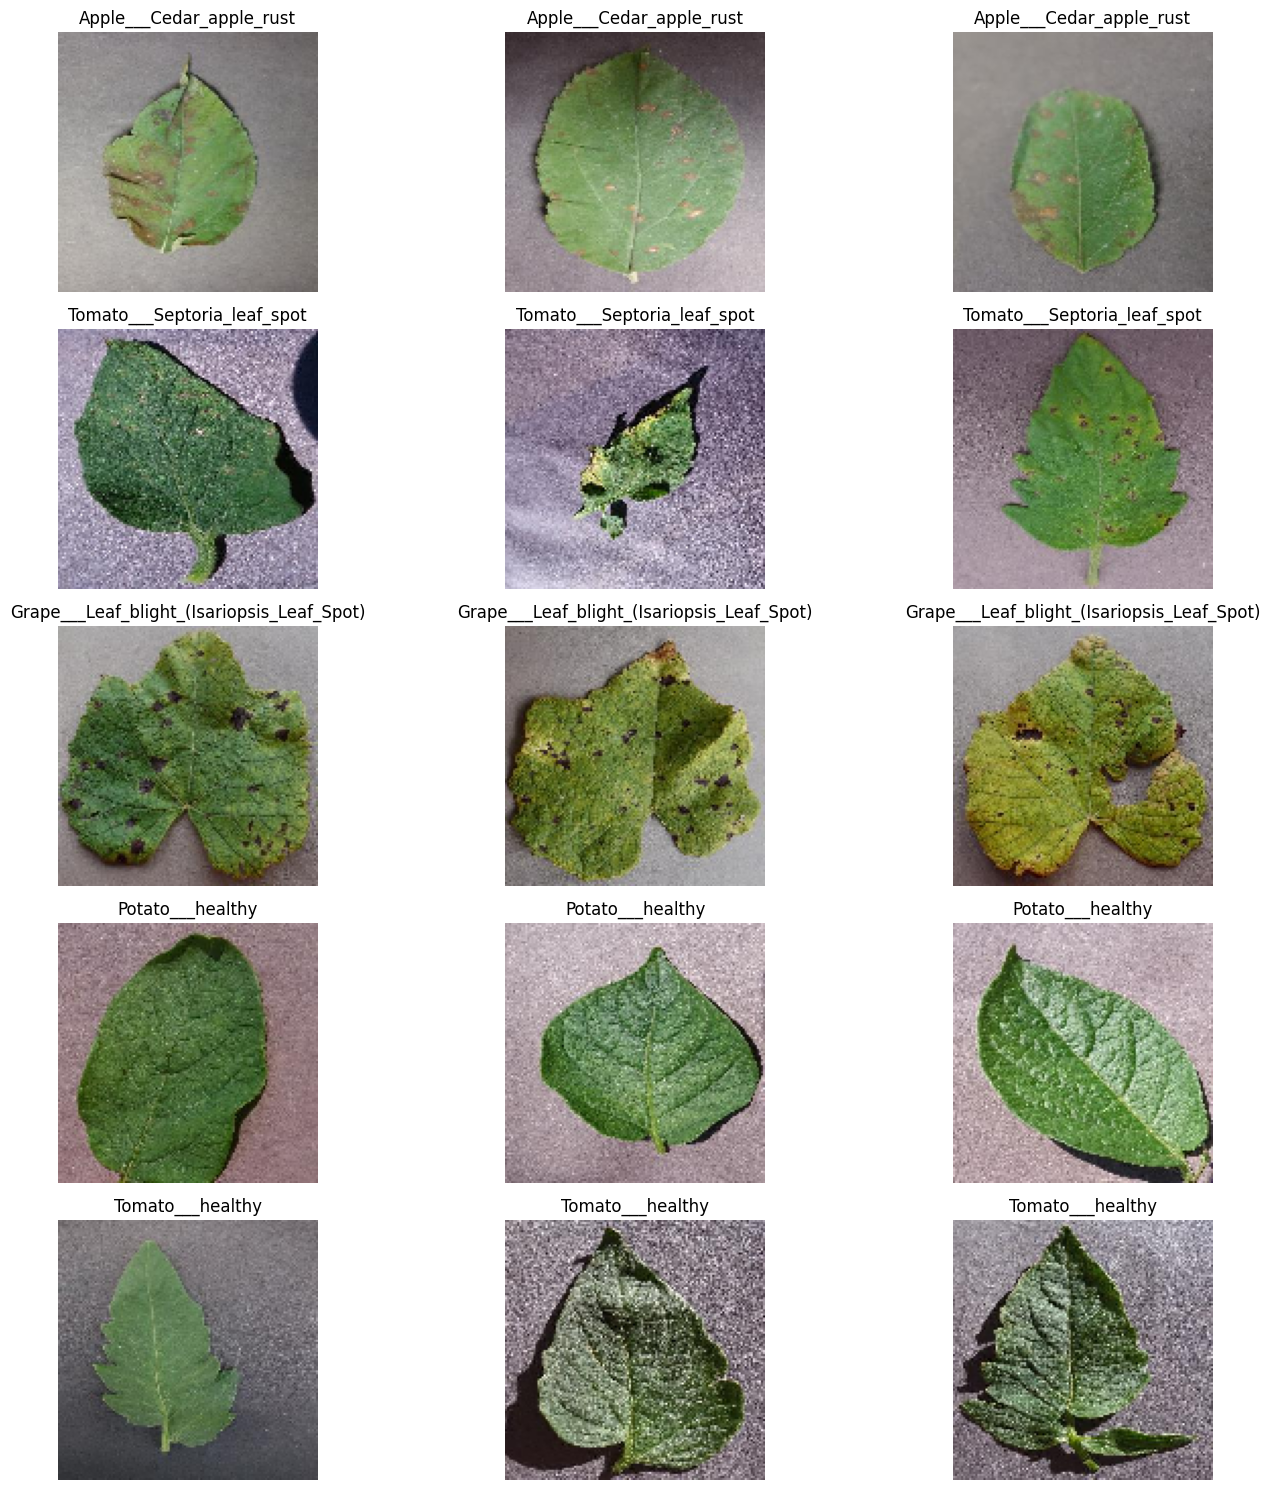

In [11]:
# Display a few sample images
def display_sample_images(categories, path_color, num_images=3):
    fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 15))
    for i, category in enumerate(categories):
        category_path = os.path.join(path_color, category)
        images = os.listdir(category_path)[:num_images]
        for j, img in enumerate(images):
            img_path = os.path.join(category_path, img)
            img = load_img(img_path, target_size=(128, 128))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(category)

    plt.tight_layout()
    plt.show()

# Show samples from 5 random categories
import random
sample_categories = random.sample(categories, 5)
display_sample_images(sample_categories, path_color)

In [12]:
# Print average image sizes for each category.
avg_sizes = {}
for category in categories:
    widths = []
    heights = []
    category_path = os.path.join(path_color, category)
    for image_file in os.listdir(category_path):
        img_path = os.path.join(category_path, image_file)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    avg_width = sum(widths) / len(widths) if widths else 0
    avg_height = sum(heights) / len(heights) if heights else 0
    avg_sizes[category] = (avg_width, avg_height)

for category, size in avg_sizes.items():
    print(f"{category}: Average size - {size}")

Corn_(maize)___Common_rust_: Average size - (256.0, 256.0)
Pepper,_bell___Bacterial_spot: Average size - (256.0, 256.0)
Tomato___Leaf_Mold: Average size - (256.0, 256.0)
Cherry_(including_sour)___healthy: Average size - (256.0, 256.0)
Potato___Late_blight: Average size - (256.0, 256.0)
Corn_(maize)___Northern_Leaf_Blight: Average size - (256.0, 256.0)
Apple___Cedar_apple_rust: Average size - (256.0, 256.0)
Tomato___Target_Spot: Average size - (256.0, 256.0)
Tomato___Late_blight: Average size - (256.0, 256.0)
Corn_(maize)___healthy: Average size - (256.0, 256.0)
Strawberry___Leaf_scorch: Average size - (256.0, 256.0)
Potato___Early_blight: Average size - (256.0, 256.0)
Tomato___Tomato_Yellow_Leaf_Curl_Virus: Average size - (256.0, 256.0)
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: Average size - (256.0, 256.0)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): Average size - (256.0, 256.0)
Strawberry___healthy: Average size - (256.0, 256.0)
Soybean___healthy: Average size - (256.0, 256

The average size of images in each category folder is 256*256 pixels.

## Data Augmentation

Data augmentation is a technique to artificially increase the size of the training dataset by applying various transformations to the images, such as rotation, shifting, shearing, zooming, and flipping. This helps to improve the model's generalization ability and prevent overfitting.

In [13]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

##Create Train, Validation, and Test Sets

In [17]:
# Split the dataset into train, validation, and test sets

all_image_paths = []  # Initialize empty lists
all_labels = []

# Populate the lists with image paths and corresponding labels
for category in categories:
    category_path = os.path.join(path_color, category)
    for image_file in os.listdir(category_path):
        img_path = os.path.join(category_path, image_file)
        all_image_paths.append(img_path)
        all_labels.append(category)

train_paths, test_paths, train_labels, test_labels = train_test_split(
    all_image_paths, all_labels, test_size=0.2, random_state=42
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.2, random_state=42
)

This section splits the dataset into training, validation, and test sets.
First, it creates lists of all image paths and their corresponding labels.
Then, it uses train_test_split from sklearn to split the data into 80% for training and 20% for testing.
Finally, it further splits the training data into 80% for training and 20% for validation. This results in three separate sets: training, validation, and test, which are essential for training and evaluating the model.

In [18]:
print(len(train_paths))
print(len(test_paths))
print(len(val_paths))


34755
10861
8689


##Save Test Set to Google Drive

In [20]:
test_set_dir = '/content/drive/MyDrive/plant_disease_test_set'
os.makedirs(test_set_dir, exist_ok=True)

test_df = pd.DataFrame({'filename': test_paths, 'class': test_labels})
test_df.to_csv(os.path.join(test_set_dir, 'test_data.csv'), index=False)

for img_path, label in zip(test_paths, test_labels):
    dest_path = os.path.join(test_set_dir, label, os.path.basename(img_path))

    # Check if the file already exists in the destination
    if os.path.exists(dest_path):
        print(f"Skipping existing file: {dest_path}")
        continue  # Skip to the next iteration

    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    shutil.copy(img_path, dest_path)
    print(f"Copied: {img_path} to {dest_path}")

Streaming output truncated to the last 5000 lines.
Copied: plantvillage dataset/color/Corn_(maize)___healthy/f327dad3-e4af-42f0-ab8f-94c1b57c0203___R.S_HL 8088 copy 2.jpg to /content/drive/MyDrive/plant_disease_test_set/Corn_(maize)___healthy/f327dad3-e4af-42f0-ab8f-94c1b57c0203___R.S_HL 8088 copy 2.jpg
Copied: plantvillage dataset/color/Tomato___Late_blight/fb5dc387-cb1d-49bb-b81e-58d60705a2fd___GHLB_PS Leaf 1.3 Day 16.jpg to /content/drive/MyDrive/plant_disease_test_set/Tomato___Late_blight/fb5dc387-cb1d-49bb-b81e-58d60705a2fd___GHLB_PS Leaf 1.3 Day 16.jpg
Copied: plantvillage dataset/color/Tomato___healthy/c6acee22-6c56-41a8-ae90-26c6064e0261___GH_HL Leaf 468.JPG to /content/drive/MyDrive/plant_disease_test_set/Tomato___healthy/c6acee22-6c56-41a8-ae90-26c6064e0261___GH_HL Leaf 468.JPG
Copied: plantvillage dataset/color/Soybean___healthy/37e6cdc5-07fb-436a-be88-5825bf10ef9d___RS_HL 3733.JPG to /content/drive/MyDrive/plant_disease_test_set/Soybean___healthy/37e6cdc5-07fb-436a-be88-582

 ## Analysis of Test Set

In [21]:
# Get the number of categories
num_categories = len(test_df['class'].unique())
print(f"Number of categories in test set: {num_categories}")

# Get the number of images per category
category_counts = test_df['class'].value_counts().to_dict()

for category, count in category_counts.items():
    print(f"{category}: {count} images")


Number of categories in test set: 38
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1074 images
Orange___Haunglongbing_(Citrus_greening): 1064 images
Soybean___healthy: 980 images
Peach___Bacterial_spot: 465 images
Tomato___Bacterial_spot: 458 images
Tomato___Late_blight: 386 images
Squash___Powdery_mildew: 365 images
Tomato___Septoria_leaf_spot: 354 images
Apple___healthy: 334 images
Tomato___Spider_mites Two-spotted_spider_mite: 329 images
Tomato___healthy: 322 images
Tomato___Target_Spot: 308 images
Pepper,_bell___healthy: 302 images
Blueberry___healthy: 289 images
Grape___Esca_(Black_Measles): 271 images
Corn_(maize)___Common_rust_: 254 images
Grape___Black_rot: 239 images
Strawberry___Leaf_scorch: 225 images
Corn_(maize)___healthy: 218 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 213 images
Corn_(maize)___Northern_Leaf_Blight: 209 images
Tomato___Early_blight: 205 images
Tomato___Leaf_Mold: 203 images
Cherry_(including_sour)___Powdery_mildew: 199 images
Potato___Late_blight: 198 im

In [22]:
# Get the total number of images
total_images = len(test_df)
print(f"Total number of images in test set: {total_images}")

Total number of images in test set: 10861


In [23]:
train_generator = datagen.flow_from_dataframe(
    pd.DataFrame({'filename': train_paths, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',

)

Found 34755 validated image filenames belonging to 38 classes.


In [24]:
val_generator = datagen.flow_from_dataframe(
    pd.DataFrame({'filename': val_paths, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
)


Found 8689 validated image filenames belonging to 38 classes.


## Model Building

In [25]:
from tensorflow.keras import Input

model = models.Sequential([
    Input(shape=(128, 128, 3)),  # Use Input layer to define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(38, activation='softmax')  # 38 categories for classification
])


In [26]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

Model Architecture

The CNN model consists of the following layers:

*   **Convolutional Layers:** Extract features from the input images.
*   **Max Pooling Layers:** Reduce the spatial dimensions of the feature maps, decreasing computational complexity and providing some translation invariance.
*   **Flatten Layer:** Convert the multi-dimensional feature maps into a one-dimensional vector.
*   **Dense Layers:** Perform classification based on the extracted features.

The ReLU activation function is used in the convolutional and dense layers to introduce non-linearity, allowing the model to learn complex patterns. The softmax activation function is used in the output layer to produce probability distributions over the different categories.

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##  Model Training

In [28]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 212s 188ms/step - accuracy: 0.3654 - loss: 2.3483 - val_accuracy: 0.6666 - val_loss: 1.1234
Epoch 2/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 203s 185ms/step - accuracy: 0.6856 - loss: 1.0236 - val_accuracy: 0.7498 - val_loss: 0.8036
Epoch 3/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 202s 185ms/step - accuracy: 0.7753 - loss: 0.7307 - val_accuracy: 0.7931 - val_loss: 0.6486
Epoch 4/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 198s 181ms/step - accuracy: 0.8249 - loss: 0.5486 - val_accuracy: 0.8462 - val_loss: 0.4826
Epoch 5/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 199s 182ms/step - accuracy: 0.8461 - loss: 0.4785 - val_accuracy: 0.8421 - val_loss: 0.4908
Epoch 6/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 199s 182ms/step - accuracy: 0.8644 - loss: 0.4222 - val_accuracy: 0.8859 - val_loss: 0.3565
Epoch 7/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 200s 183ms/step - accuracy: 0.8811 - loss: 0.3663 - val_accuracy: 0.8496 - val_loss: 0.4584
Epoch 8/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 199s 182ms/step - accuracy: 0.8

In [33]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

272/272 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.9493 - loss: 0.1650
Validation Loss: 0.1780378818511963
Validation Accuracy: 0.9454482793807983


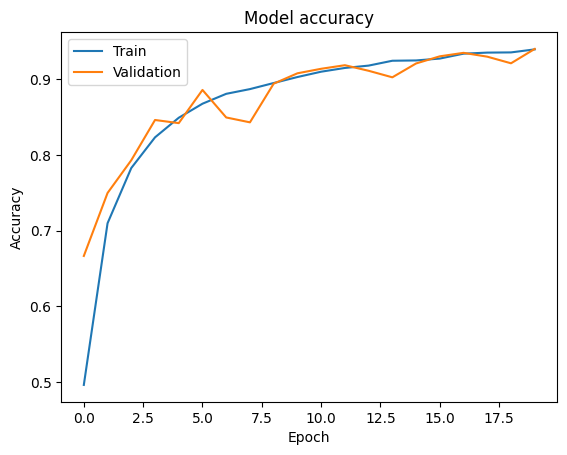

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


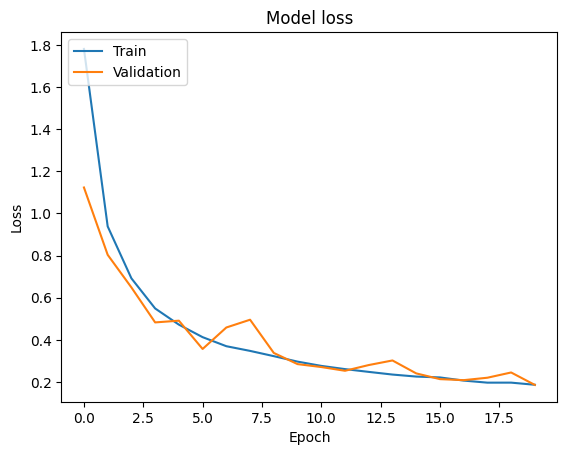

In [35]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
import json
# Get the mapping of class indices to category names and reverse it
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Save the reversed mapping directly as a JSON file
with open('class_indices.json', 'w') as f:
    json.dump(idx_to_class, f)

print("Reversed class indices saved to 'class_indices.json'")

Reversed class indices saved to 'class_indices.json'


In [37]:

# Load the reversed class indices mapping
with open('class_indices.json', 'r') as f:
    idx_to_class = json.load(f)

# Define the prediction function
def predict_disease(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class and category name
    predicted_class = np.argmax(predictions[0])
    predicted_category_name = idx_to_class[str(predicted_class)]

    # Print the predicted category name
    print(f'Predicted category: {predicted_category_name}')

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
Predicted category: Apple___Black_rot


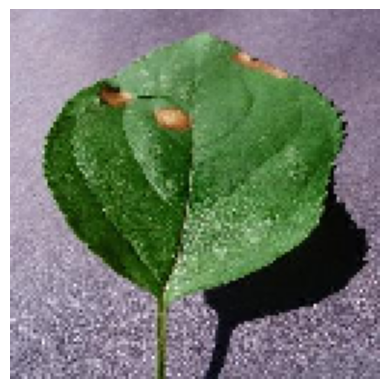

In [39]:
# Path to the image for prediction
image_path = '/content/drive/MyDrive/plant_disease_test_set/Apple___Black_rot/07f6b5a7-47cd-4012-8fcd-969d1d7245b9___JR_FrgE.S 2961.JPG'

# Call the predict_disease function
predict_disease(image_path)

In [40]:
model.save('/content/drive/MyDrive/plant_disease_cnnmodel.keras')


In [41]:
#Load and Predict on Test Set (after training)
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_dataframe(
    pd.read_csv(os.path.join(test_set_dir, 'test_data.csv')),
    x_col='filename',
    y_col='class',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for evaluation
)

loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 10861 validated image filenames belonging to 38 classes.
  5/340 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8184 - loss: 0.6603

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9075 - loss: 0.3937
Test Loss: 0.3578813672065735
Test Accuracy: 0.9102292656898499
